In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
lbd = 0.25
L = 8
N = 64
d = np.linspace(0, 8, N)
print(d)

[0.         0.12698413 0.25396825 0.38095238 0.50793651 0.63492063
 0.76190476 0.88888889 1.01587302 1.14285714 1.26984127 1.3968254
 1.52380952 1.65079365 1.77777778 1.9047619  2.03174603 2.15873016
 2.28571429 2.41269841 2.53968254 2.66666667 2.79365079 2.92063492
 3.04761905 3.17460317 3.3015873  3.42857143 3.55555556 3.68253968
 3.80952381 3.93650794 4.06349206 4.19047619 4.31746032 4.44444444
 4.57142857 4.6984127  4.82539683 4.95238095 5.07936508 5.20634921
 5.33333333 5.46031746 5.58730159 5.71428571 5.84126984 5.96825397
 6.0952381  6.22222222 6.34920635 6.47619048 6.6031746  6.73015873
 6.85714286 6.98412698 7.11111111 7.23809524 7.36507937 7.49206349
 7.61904762 7.74603175 7.87301587 8.        ]


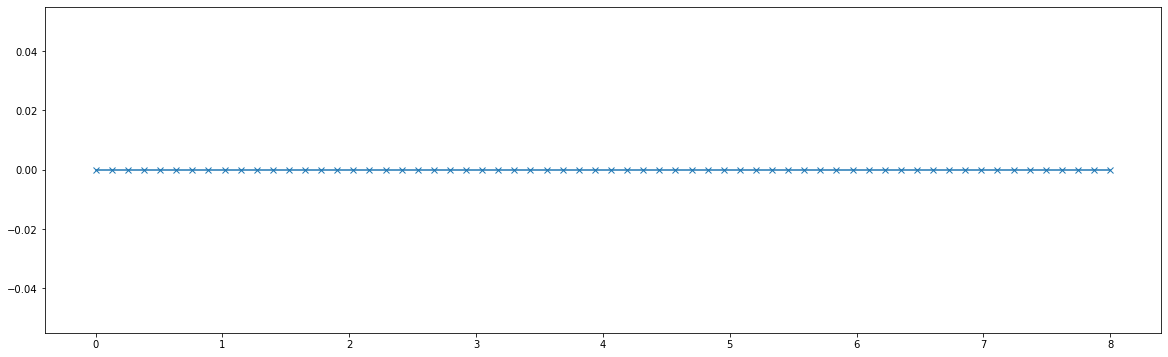

In [3]:
plt.figure(figsize=(10*2, 3*2))
plt.plot(d, np.zeros(len(d)), marker='x')
plt.show()

In [4]:
def Shum(N):
    GSHUp = []
    for i in range(N):
        y = np.random.normal(0, 1, 64)
        GSHUp.append(y)
    ReASh = sum(GSHUp[:N//2])
    ImASh = sum(GSHUp[N//2:])
    ASh = ReASh + 1j*ImASh
    DRL = np.array([1j]*64)
    k = 2*np.pi/lbd
    for i in range(64):
        DRL[i] = ASh[i] + np.exp(1j * k * 10**(-2) * d[i] * np.sin(np.radians(10)))
    Dssh = DRL
    sumDssh = np.sum(Dssh * Dssh.conjugate())
    varRe = np.var(Dssh.real)
    varIm = np.var(Dssh.imag)
    return (Dssh ,sumDssh.real, varRe, varIm)

In [5]:
Dssh, sumDssh, varRe, varIm = Shum(6)
X = np.linspace(0, 65, 64)
print(F'sumDssh = {sumDssh}')
print(F'var(Re(Dssh)) = {varRe}')
print(F'var(Im(Dssh)) = {varIm}')

sumDssh = 477.5036055802956
var(Re(Dssh)) = 3.0782046967234917
var(Im(Dssh)) = 3.6605015218591452


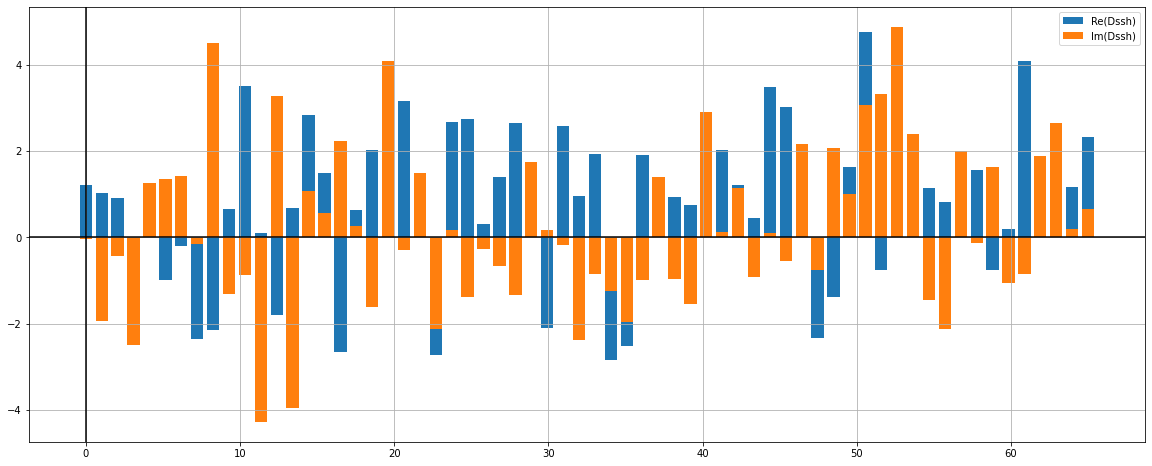

In [6]:
fig = plt.figure(figsize=(20, 8))
plt.xticks(np.arange(0, 161, 10))
plt.grid()
ax = plt.gca()    
ax.axhline(y=0, color='k')   
ax.axvline(x=0, color='k')
plt.bar(X, Dssh.real, label = "Re(Dssh)")
plt.bar(X, Dssh.imag, label = "Im(Dssh)")
plt.legend()
plt.show()

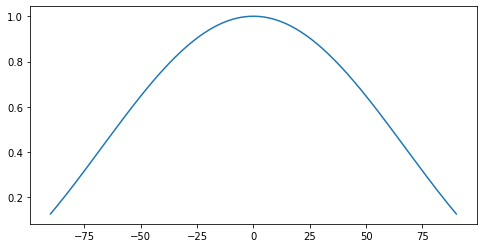

In [7]:
def AM1(theta, Theta = 90):
    k = (2.78 * theta/Theta) ** 2
    return np.sin(np.sqrt(k))/np.sqrt(k) if k != 0 else 1
AM1 = np.vectorize(AM1, excluded=['Theta', 'theta'])

X = np.linspace(-90, 90, 180)
plt.figure(figsize=(8, 4))
plt.plot(X, AM1(X))
plt.show()

In [37]:
def AR11(d, lbd, theta, theta1):
    k = 2*np.pi/lbd
    x = 0
    for i in range(len(d)):
        x += np.exp(-1j * k * d[i] * np.sin(np.radians(theta - theta1)))
    print(x.shape)
    return x

def AR11Shum(d, lbd, theta, theta1, Dssh):
    k = 2*np.pi/lbd
    x = 0
    for i in range(len(d)):
        x += (1 + Dssh[i]) * np.exp(-1j * k * d[i] * np.sin(np.radians(theta - theta1)))
    print(x.shape)
    return x

def DN1L(d, lbd, theta, theta1):
    AR = AR11(d, lbd, theta, theta1)
    AM = AM1(theta)
    return 10*np.log10(AM*AR*np.conjugate(AR)/len(d)**2)

def DN1LShum(d, lbd, theta, theta1, Dssh):
    AR = AR11Shum(d, lbd, theta, theta1, Dssh)
    AM = AM1(theta)
    return 10*np.log10(AM*AR*np.conjugate(AR)/(len(d) + 50)**2)

(4000,)


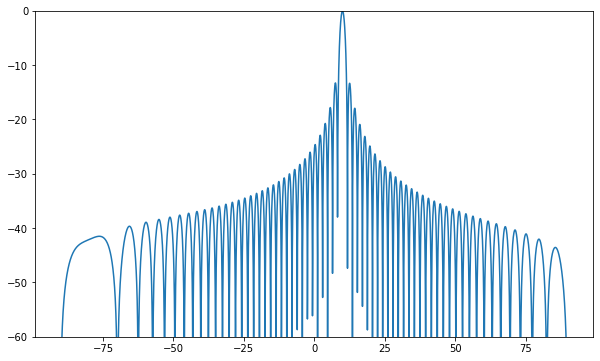

In [38]:
X = np.linspace(-90, 90, 4000)
# plt.xlim(-89, 89)
DNL = DN1L(d, lbd, X, 10).real
plt.figure(figsize=(5*2, 3*2))
plt.ylim(-60, 0)
plt.plot(X, DNL)
plt.show()

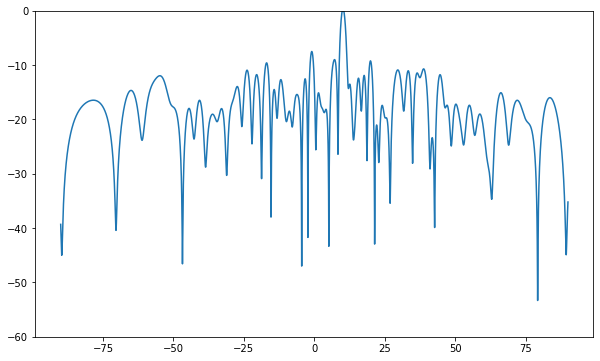

In [32]:
X = np.linspace(-90, 90, 4000)
# plt.xlim(-89, 89)
DNLShum = DN1LShum(d, lbd, X, 10, Dssh).real
plt.figure(figsize=(5*2, 3*2))
plt.ylim(-60, 0)
plt.plot(X, DNLShum)
plt.show()